In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver/usr/bin

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 12.9 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugi

In [ ]:


!pip install webdriver_manager

!pip install chromedriver_autoinstaller



In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options as ChromeOptions

from webdriver_manager.chrome import ChromeDriverManager
import time
import chromedriver_autoinstaller

options = ChromeOptions()
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36"
options.add_argument('user-agent=' + user_agent)
options.add_argument("lang=ko_KR")
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(options=options) # <- options로 변경



In [ ]:
# import pandas as pd

# df=pd.DataFrame(columns=['이름','출루율','장타율','OPS','삼진'])
# print(df)


In [ ]:
from selenium.webdriver.common.keys import Keys
import pandas as pd

# 스탯티즈 접속
driver.get('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=WAR&ob=DESC&year=2024&sy=&ey=&te=&po=&lt=10100&reg=C100&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=200&ph=&hs=&us=&na=&ls=1&sf1=WAROff&sk1=&sv1=&sf2=WAROff&sk2=&sv2=')


df=pd.DataFrame(columns=['이름','타율','출루율','장타율','ops','삼진','WAR','wRC+'])
a=0

for i in range(3,150):
  obp=driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[28]')
  slg=driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[28]')
  ops = driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[30]')
  name=driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[2]/div/a')
  so=driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[23]')
  avg=driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[27]')
  war=driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[33]')
  wrc=driver.find_element('xpath',f'/html/body/div[2]/div[5]/section/div[8]/table/tbody/tr[{i}]/td[32]')

  df.loc[a]=[name.text,avg.text,obp.text,slg.text,ops.text,so.text,war.text,wrc.text]
  a+=1

print(df.head())
print(df.info())
df.to_csv('kbo스탯.csv',index=False,encoding="utf-8-sig")


     이름     투심     포심     커터     커브     슬라     첸접     포크
0   김도영  0.333  0.374  0.389  0.294  0.353  0.365  0.200
1   로하스  0.167  0.389  0.375  0.320  0.217  0.354  0.313
2   구자욱  0.419  0.369  0.353  0.213  0.295  0.451  0.321
3   고승민  0.483  0.413  0.350  0.262  0.219  0.204  0.135
4   송성문  0.407  0.369  0.375  0.152  0.324  0.342  0.364
..  ...    ...    ...    ...    ...    ...    ...    ...
95  강승호  0.441  0.256  0.269  0.317  0.255  0.286  0.286
96  서건창  0.385  0.262  0.167  0.500  0.387  0.350  0.350
97  최지훈  0.533  0.256  0.176  0.259  0.219  0.367  0.241
98  김상수  0.458  0.267  0.200  0.409  0.235  0.258  0.294
99  박준영  0.231  0.181  0.400  0.214  0.250  0.304  0.286

[100 rows x 8 columns]


In [2]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import plotly.express as px

df=pd.read_csv('./레그킥완2.csv',index_col='이름',encoding= 'cp949')

df_grouped=df.groupby('LegKick')['장타율'].mean().reset_index()
df_grouped['LegKick'] = df_grouped['LegKick'].map({1: '레그킥 O', 0: '레그킥 X'})
bar_fig = px.bar(df_grouped,
                 x='LegKick',
                 y='장타율',
                 labels={'LegKick': '레그킥 여부', '장타율': '평균 장타율'},
                 title='레그킥 여부에 따른 평균 장타율 차이',
                 text='장타율')
bar_fig.update()


In [5]:
df_grouped3=df.groupby('LegKick')['삼진'].mean().reset_index()
df_grouped3['LegKick'] = df_grouped3['LegKick'].map({1: '레그킥 O', 0: '레그킥 X'})
bar_fig3 = px.bar(df_grouped3,
                 x='LegKick',
                 y='삼진',
                 labels={'LegKick': '레그킥 여부', '삼진': '평균 삼진'},
                 title='레그킥 여부에 따른 평균 삼진 차이',
                 text='삼진')
bar_fig3.update()

In [4]:
df_grouped4=df.groupby('LegKick')['출루율'].mean().reset_index()
df_grouped4['LegKick'] = df_grouped4['LegKick'].map({1: '레그킥 O', 0: '레그킥 X'})
bar_fig4 = px.bar(df_grouped4,
                 x='LegKick',
                 y='출루율',
                 labels={'LegKick': '레그킥 여부', '출루율': '평균 출루율'},
                 title='레그킥 여부에 따른 평균 출루율 차이',
                 text='출루율')
bar_fig4.update()

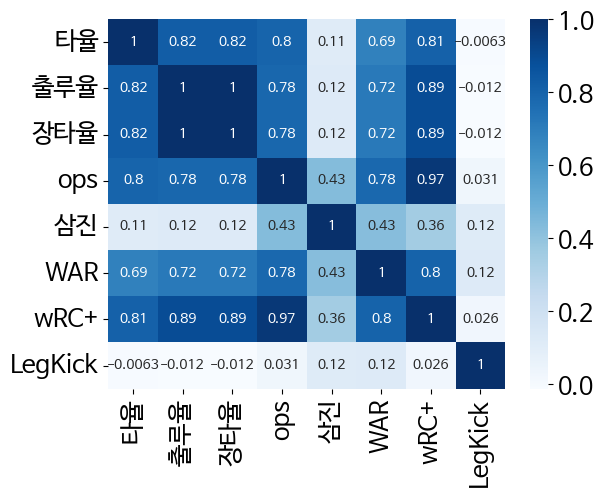

In [12]:
df2=df.reset_index()
df2.drop(['이름'],axis=1,inplace=True)
sns.heatmap(df2.corr(),cmap='Blues',annot=True, annot_kws={"size": 10})
plt.show()
